In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from vitRet.data.imageNet import ImageNetDataModule

In [18]:
data_dir = "/usagers/clpla/data/imageNet/ILSVRC/Data/CLS-LOC/"
synset_file = "/usagers/clpla/data/imageNet/LOC_synset_mapping.txt"
cls_file = "/usagers/clpla/data/imageNet/val_solution.csv"
img_size = 512
scales = 1
datamodule = ImageNetDataModule(
    img_size=(img_size, img_size), 
    data_dir=data_dir, 
    synset_mapping=synset_file, 
    csv_file=cls_file, 
    batch_size=4, 
    num_workers=4,
    use_superpixels=True,
    superpixels_max_nb=1024,
    superpixels_scales=scales
)
datamodule.setup("test")
datamodule.setup("fit")

Train set: 1153051
Val set: 128116


Dataloader built
Batch got loaded


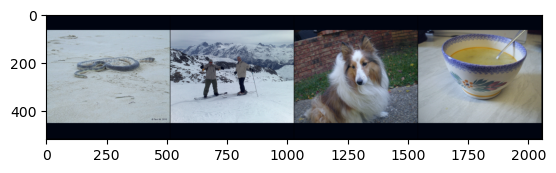

/usagers/clpla/.conda/envs/torch18/lib/python3.9/site-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  return F.conv2d(input, weight, bias, self.stride,


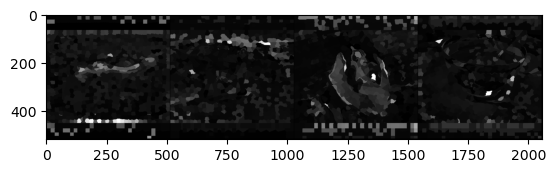

['swimming, trunks,, bathing, trunks', 'swimming, trunks,, bathing, trunks', 'swimming, trunks,, bathing, trunks', 'swimming, trunks,, bathing, trunks']


In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from vitRet.models.model_factory import create_model

model = create_model(
    "svt_16_large",
    pretrained=True,
    num_classes=1000,
    img_size=img_size,
    padding='same',
    scales=scales,
    projection_stride=1,
    global_pool=False,
    single_cls_token=True
)
dataloader = datamodule.test_dataloader(False)
print('Dataloader built')
batch = next(iter(dataloader))
print('Batch got loaded')
segments = batch['segments']
mosaic = make_grid(batch["image"], normalize=True)
plt.imshow(mosaic.permute(1, 2, 0))
plt.show()

pred, attn = model(batch["image"], segments, True)
pred = pred.argmax(dim=1)
attn.unsqueeze_(1)
attn = make_grid(attn, normalize=True)

plt.imshow(attn.permute(1, 2, 0))
plt.show()
print(datamodule.human_readable_labels(pred))

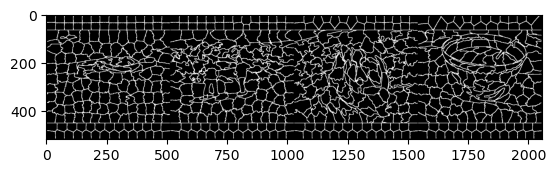

In [14]:
import torch
from kornia.morphology import gradient

seg_border = gradient(segments[:, 1].unsqueeze(1), torch.ones(3,3)) > 0
seg_border = make_grid(seg_border.float(), normalize=True)
plt.imshow(seg_border.permute(1, 2, 0))
plt.show()

In [16]:
segments.shape

torch.Size([4, 3, 512, 512])